# Machine failure prediction

## Introduction

In the field of industrial maintenance and operations, the timely detection of machine failures is crucial to prevent unexpected downtime, minimize production losses, and optimize maintenance strategies. Machine learning techniques have emerged as valuable tools for predicting and classifying data. However, the effectiveness of such models heavily relies on the quality and balance of the dataset used for training.

Throughout this project, I will explore different techniques for addressing class imbalance, including oversampling and undersampling methods, such as Synthetic Minority Over-sampling Technique (SMOTE) and Random Under-Sampling (RUS). Additionally, I will investigate the impact of various feature engineering strategies, such as dimensionality reduction and feature selection, to improve the model's ability to discriminate between healthy and failing machines.

The performance of the developed binary classification models will be evaluated using accuracy, consufion matrix and area under the receiver operating characteristic curve (AUC-ROC). The results will be compared with a baseline model trained on the original unbalanced dataset, highlighting the effectiveness of the proposed techniques in improving the model's performance on the minority class (failure machines).

## Loading the train data uploaded to Databricks previously

In [0]:
# File location and type
file_location = "/FileStore/tables/train.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

id Product ID Type Air temperature [K] Process temperature [K] Rotational speed [rpm] Torque [Nm] Tool wear [min] Machine failure TWF HDF PWF OSF RNF 0 L50096 L 300.6 309.6 1596 36.1 140 0 0 0 0 0 0 1 M20343 M 302.6 312.1 1759 29.1 200 0 0 0 0 0 0 2 L49454 L 299.3 308.5 1805 26.5 25 0 0 0 0 0 0 3 L53355 L 301.0 310.9 1524 44.3 197 0 0 0 0 0 0 4 M24050 M 298.0 309.0 1641 35.4 34 0 0 0 0 0 0 5 M24300 M 298.4 308.9 1429 42.1 65 0 0 0 0 0 0 6 L56736 L 299.6 311.0 1413 42.9 156 0 0 0 0 0 0 7 L55488 L 298.7 310.1 1609 38.1 67 0 0 0 0 0 0 8 L56397 L 297.7 308.8 1578 35.2 13 0 0 0 0 0 0 9 L55067 L 300.5 312.3 1447 53.3 98 0 0 0 0 0 0 10 L53273 L 301.0 310.8 1408 47.7 139 0 0 0 0 0 0 11 L52981 L 301.5 310.8 1432 43.6 166 0 0 0 0 0 0 12 M21422 M 301.4 310.7 1659 40.9 152 0 0 0 0 0 0 13 L56091 L 297.1 308.4 1470 43.8 204 0 0 0 0 0 0 14 L57008 L 298.5 309.4 1385 53.1 143 0 0 0 0 0 0 15 M15219 M 297.6 308.3 1567 34.6 38 0 0 0 0 0 0 16 L50318 L 300.4 309.9 1452 39.2 72 0 0 0 0 0 0 17 L50201 L 300.5 309.8 1421 49.6 5 0 0 0 0 0 0 18 L54856 L 300.5 311.7 1408 49.5 0 0 0 0 0 0 0 19 L52109 L 303.5 312.4 1408 44.6 76 0 0 0 0 0 0 20 L50643 L 301.5 310.4 1424 53.9 40 0 0 0 0 0 0 21 L49187 L 298.6 308.4 1555 40.3 27 0 0 0 0 0 0 22 L53257 L 300.9 310.7 1479 39.1 23 0 0 0 0 0 0 23 L53313 L 301.0 310.9 1470 40.9 190 0 0 0 0 0 0 24 L56269 L 297.2 307.9 1676 32.2 173 0 0 0 0 0 0 25 L55142 L 301.0 312.2 1427 47.7 162 0 0 0 0 0 0 26 H39350 H 298.3 308.2 1534 33.2 2 0 0 0 0 0 0 27 L56208 L 297.4 308.4 1462 43.8 0 0 0 0 0 0 0 28 L53040 L 301.3 311.0 1492 41.4 124 0 0 0 0 0 0 29 L50227 L 300.2 309.5 1445 38.3 51 0 0 0 0 0 0 30 M17675 M 300.1 309.3 1507 43.3 111 0 0 0 0 0 0 31 H35898 H 300.6 309.8 1423 22.5 129 0 0 0 0 0 0 32 L52106 L 303.5 312.3 1436 47.3 71 0 0 0 0 0 0 33 M24800 M 298.3 308.1 1560 35.7 89 0 0 0 0 0 0 34 L56576 L 297.8 308.3 1334 49.7 158 0 0 0 0 0 0 35 H35545 H 301.0 311.0 1473 46.3 118 0 0 0 0 0 0 36 L55218 L 300.7 311.9 1486 39.6 19 0 0 0 0 0 0 37 L55076 L 300.8 312.4 1618 28.3 119 0 0 0 0 0 0 38 L49056 L 298.3 308.0 1435 47.8 94 0 0 0 0 0 0 39 L53718 L 301.4 310.6 1487 44.6 83 0 0 0 0 0 0 40 L55605 L 299.2 310.6 1383 44.4 172 0 0 0 0 0 0 41 L56398 L 297.7 308.8 1526 37.4 103 0 0 0 0 0 0 42 M17591 M 299.7 309.1 1566 32.9 135 0 0 0 0 0 0 43 L52753 L 302.5 312.2 1469 39.9 14 0 0 0 0 0 0 44 L50736 L 301.8 310.9 1686 30.3 155 0 0 0 0 0 0 45 M15683 M 296.7 307.5 1465 48.5 161 0 0 0 0 0 0 46 M20419 M 302.4 312.0 1528 43.4 9 0 0 0 0 0 0 47 M23105 M 299.2 310.6 1538 38.8 119 0 0 0 0 0 0 48 M24285 M 298.1 308.6 1515 33.0 27 0 0 0 0 0 0 49 M18397 M 301.9 311.0 1671 30.6 20 0 0 0 0 0 0 50 M16902 M 299.1 308.9 1397 52.4 124 0 0 0 0 0 0 51 L52799 L 302.6 312.0 1451 43.0 183 0 0 0 0 0 0 52 L49504 L 299.3 308.8 1486 29.9 201 0 0 0 0 0 0 53 L54552 L 299.6 310.2 1469 42.7 23 0 0 0 0 0 0 54 M14955 M 299.0 309.0 1636 33.4 90 0 0 0 0 0 0 55 L54996 L 299.8 311.2 1533 32.1 144 0 0 0 0 0 0 56 L55110 L 300.6 311.6 1497 43.9 206 0 0 0 0 0 0 57 M23304 M 298.9 310.2 1487 42.9 9 0 0 0 0 0 0 58 L56642 L 298.5 309.3 1446 43.4 131 0 0 0 0 0 0 59 M20494 M 302.6 312.1 1368 56.5 168 0 0 0 0 0 0 60 L47768 L 297.6 309.4 1738 25.9 53 0 0 0 0 0 0 61 L51239 L 301.9 310.8 1366 52.6 99 0 0 0 0 0 0 62 M23600 M 297.3 308.6 1554 40.1 70 0 0 0 0 0 0 63 L54293 L 300.9 310.4 1561 32.7 25 0 0 0 0 0 0 64 L54263 L 300.7 310.4 1447 41.7 211 0 0 0 0 0 0 65 L55827 L 297.4 308.5 1530 38.5 93 0 0 0 0 0 0 66 L56403 L 297.9 309.0 1481 38.8 37 0 0 0 0 0 0 67 L50494 L 301.4 310.5 1697 31.4 173 0 0 0 0 0 0 68 L53033 L 301.3 311.0 1555 33.1 64 0 0 0 0 0 0 69 L56909 L 298.8 309.8 1479 46.6 145 0 0 0 0 0 0 70 L55502 L 298.7 309.7 1364 44.9 106 0 0 0 0 0 0 71 L55326 L 299.6 310.9 1602 31.8 80 0 0 0 0 0 0 72 L53551 L 300.0 309.6 1366 46.6 77 0 0 0 0 0 0 73 L56239 L 297.2 308.3 1805 44.6 13 0 0 0 0 0 0 74 L50936 L 302.3 311.1 1546 44.6 156 0 0 0 0 0 0 75 L55162 L 301.0 312.3 1490 42.6 127 0 0 0 0 0 0 76 L54825 L 300.4 311.4 1436 43.2 129 0 0 0 0 0 0 77 L55814 L 297.5 308.4 1512 36.9 141 0 0 0 0 0 0 78 L5

### Standardization of columns name

In [0]:
from pyspark.sql.functions import regexp_replace, col

# Rename columns with spaces to columns with underscores
df = df.withColumnRenamed("Product Id", "product_id")\
        .withColumnRenamed("Air temperature [K]", "air_temperature")\
        .withColumnRenamed("Process temperature [K]", "process_temperature")\
        .withColumnRenamed("Rotational speed [rpm]", "rotational_speed")\
        .withColumnRenamed("Torque [Nm]", "torque")\
        .withColumnRenamed("Tool wear [min]", "tool_wear")\
        .withColumnRenamed("machine failure", "machine_failure")

# Lower all columns name
df = df.select([c.lower() for c in df.columns])

# Remove unwanted characters from columns name
df = df.select([regexp_replace(col(c), "[ ,;{}()\n\t=]", "").alias(c) for c in df.columns])
display(df)    

id product_id type air_temperature process_temperature rotational_speed torque tool_wear machine_failure twf hdf pwf osf rnf 0 L50096 L 300.6 309.6 1596 36.1 140 0 0 0 0 0 0 1 M20343 M 302.6 312.1 1759 29.1 200 0 0 0 0 0 0 2 L49454 L 299.3 308.5 1805 26.5 25 0 0 0 0 0 0 3 L53355 L 301.0 310.9 1524 44.3 197 0 0 0 0 0 0 4 M24050 M 298.0 309.0 1641 35.4 34 0 0 0 0 0 0 5 M24300 M 298.4 308.9 1429 42.1 65 0 0 0 0 0 0 6 L56736 L 299.6 311.0 1413 42.9 156 0 0 0 0 0 0 7 L55488 L 298.7 310.1 1609 38.1 67 0 0 0 0 0 0 8 L56397 L 297.7 308.8 1578 35.2 13 0 0 0 0 0 0 9 L55067 L 300.5 312.3 1447 53.3 98 0 0 0 0 0 0 10 L53273 L 301.0 310.8 1408 47.7 139 0 0 0 0 0 0 11 L52981 L 301.5 310.8 1432 43.6 166 0 0 0 0 0 0 12 M21422 M 301.4 310.7 1659 40.9 152 0 0 0 0 0 0 13 L56091 L 297.1 308.4 1470 43.8 204 0 0 0 0 0 0 14 L57008 L 298.5 309.4 1385 53.1 143 0 0 0 0 0 0 15 M15219 M 297.6 308.3 1567 34.6 38 0 0 0 0 0 0 16 L50318 L 300.4 309.9 1452 39.2 72 0 0 0 0 0 0 17 L50201 L 300.5 309.8 1421 49.6 5 0 0 0 0 0 0 18 L54856 L 300.5 311.7 1408 49.5 0 0 0 0 0 0 0 19 L52109 L 303.5 312.4 1408 44.6 76 0 0 0 0 0 0 20 L50643 L 301.5 310.4 1424 53.9 40 0 0 0 0 0 0 21 L49187 L 298.6 308.4 1555 40.3 27 0 0 0 0 0 0 22 L53257 L 300.9 310.7 1479 39.1 23 0 0 0 0 0 0 23 L53313 L 301.0 310.9 1470 40.9 190 0 0 0 0 0 0 24 L56269 L 297.2 307.9 1676 32.2 173 0 0 0 0 0 0 25 L55142 L 301.0 312.2 1427 47.7 162 0 0 0 0 0 0 26 H39350 H 298.3 308.2 1534 33.2 2 0 0 0 0 0 0 27 L56208 L 297.4 308.4 1462 43.8 0 0 0 0 0 0 0 28 L53040 L 301.3 311.0 1492 41.4 124 0 0 0 0 0 0 29 L50227 L 300.2 309.5 1445 38.3 51 0 0 0 0 0 0 30 M17675 M 300.1 309.3 1507 43.3 111 0 0 0 0 0 0 31 H35898 H 300.6 309.8 1423 22.5 129 0 0 0 0 0 0 32 L52106 L 303.5 312.3 1436 47.3 71 0 0 0 0 0 0 33 M24800 M 298.3 308.1 1560 35.7 89 0 0 0 0 0 0 34 L56576 L 297.8 308.3 1334 49.7 158 0 0 0 0 0 0 35 H35545 H 301.0 311.0 1473 46.3 118 0 0 0 0 0 0 36 L55218 L 300.7 311.9 1486 39.6 19 0 0 0 0 0 0 37 L55076 L 300.8 312.4 1618 28.3 119 0 0 0 0 0 0 38 L49056 L 298.3 308.0 1435 47.8 94 0 0 0 0 0 0 39 L53718 L 301.4 310.6 1487 44.6 83 0 0 0 0 0 0 40 L55605 L 299.2 310.6 1383 44.4 172 0 0 0 0 0 0 41 L56398 L 297.7 308.8 1526 37.4 103 0 0 0 0 0 0 42 M17591 M 299.7 309.1 1566 32.9 135 0 0 0 0 0 0 43 L52753 L 302.5 312.2 1469 39.9 14 0 0 0 0 0 0 44 L50736 L 301.8 310.9 1686 30.3 155 0 0 0 0 0 0 45 M15683 M 296.7 307.5 1465 48.5 161 0 0 0 0 0 0 46 M20419 M 302.4 312.0 1528 43.4 9 0 0 0 0 0 0 47 M23105 M 299.2 310.6 1538 38.8 119 0 0 0 0 0 0 48 M24285 M 298.1 308.6 1515 33.0 27 0 0 0 0 0 0 49 M18397 M 301.9 311.0 1671 30.6 20 0 0 0 0 0 0 50 M16902 M 299.1 308.9 1397 52.4 124 0 0 0 0 0 0 51 L52799 L 302.6 312.0 1451 43.0 183 0 0 0 0 0 0 52 L49504 L 299.3 308.8 1486 29.9 201 0 0 0 0 0 0 53 L54552 L 299.6 310.2 1469 42.7 23 0 0 0 0 0 0 54 M14955 M 299.0 309.0 1636 33.4 90 0 0 0 0 0 0 55 L54996 L 299.8 311.2 1533 32.1 144 0 0 0 0 0 0 56 L55110 L 300.6 311.6 1497 43.9 206 0 0 0 0 0 0 57 M23304 M 298.9 310.2 1487 42.9 9 0 0 0 0 0 0 58 L56642 L 298.5 309.3 1446 43.4 131 0 0 0 0 0 0 59 M20494 M 302.6 312.1 1368 56.5 168 0 0 0 0 0 0 60 L47768 L 297.6 309.4 1738 25.9 53 0 0 0 0 0 0 61 L51239 L 301.9 310.8 1366 52.6 99 0 0 0 0 0 0 62 M23600 M 297.3 308.6 1554 40.1 70 0 0 0 0 0 0 63 L54293 L 300.9 310.4 1561 32.7 25 0 0 0 0 0 0 64 L54263 L 300.7 310.4 1447 41.7 211 0 0 0 0 0 0 65 L55827 L 297.4 308.5 1530 38.5 93 0 0 0 0 0 0 66 L56403 L 297.9 309.0 1481 38.8 37 0 0 0 0 0 0 67 L50494 L 301.4 310.5 1697 31.4 173 0 0 0 0 0 0 68 L53033 L 301.3 311.0 1555 33.1 64 0 0 0 0 0 0 69 L56909 L 298.8 309.8 1479 46.6 145 0 0 0 0 0 0 70 L55502 L 298.7 309.7 1364 44.9 106 0 0 0 0 0 0 71 L55326 L 299.6 310.9 1602 31.8 80 0 0 0 0 0 0 72 L53551 L 300.0 309.6 1366 46.6 77 0 0 0 0 0 0 73 L56239 L 297.2 308.3 1805 44.6 13 0 0 0 0 0 0 74 L50936 L 302.3 311.1 1546 44.6 156 0 0 0 0 0 0 75 L55162 L 301.0 312.3 1490 42.6 127 0 0 0 0 0 0 76 L54825 L 300.4 311.4 1436 43.2 129 0 0 0 0 0 0 77 L55814 L 297.5 308.4 1512 36.9 141 0 0 0 0 0 0 78 L55970 L 297.4 308.5 1382 4

### Saving data

In [0]:
# Save table

permanent_table_name = "train_csv"

df.write.mode("overwrite").format("csv")\
    .option("path", "/tables")\
    .saveAsTable(permanent_table_name)

In [0]:
# Check if table exists
dbutils.fs.ls("./tables")

Out[79]: [FileInfo(path='dbfs:/tables/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1689621015000),
 FileInfo(path='dbfs:/tables/_committed_6145017237376570438', name='_committed_6145017237376570438', size=200, modificationTime=1689621015000),
 FileInfo(path='dbfs:/tables/_started_6145017237376570438', name='_started_6145017237376570438', size=0, modificationTime=1689621011000),
 FileInfo(path='dbfs:/tables/part-00000-tid-6145017237376570438-69f4639a-db00-43d1-90b0-dcc337b48c3a-56-1-c000.csv', name='part-00000-tid-6145017237376570438-69f4639a-db00-43d1-90b0-dcc337b48c3a-56-1-c000.csv', size=4194186, modificationTime=1689621015000),
 FileInfo(path='dbfs:/tables/part-00001-tid-6145017237376570438-69f4639a-db00-43d1-90b0-dcc337b48c3a-57-1-c000.csv', name='part-00001-tid-6145017237376570438-69f4639a-db00-43d1-90b0-dcc337b48c3a-57-1-c000.csv', size=2986814, modificationTime=1689621014000)]

## Exploratory Data Analysis

### Loading the table using Apache Spark SQL

In [0]:
%sql

CREATE OR REPLACE TABLE train
USING DELTA LOCATION "/tables"
--TBLPROPERTIES ('delta.columnMapping.mode' = 'name')
AS (
  SELECT
    first(type) AS type,
    first(machine_failure) AS machine_failure,
    MAX(CAST(air_temperature AS INT)) AS max_air_temperature,
    MIN(CAST(air_temperature AS INT)) AS min_air_temperature,
    AVG(CAST(air_temperature AS INT)) AS avg_air_temperature,
    MAX(CAST(process_temperature AS INT)) AS max_process_temperature,
    MIN(CAST(process_temperature AS INT)) AS min_process_temperature,
    AVG(CAST(process_temperature AS INT)) AS avg_process_temperature,
    MAX(CAST(rotational_speed AS INT)) AS max_rotational_speed,
    MIN(CAST(rotational_speed AS INT)) AS min_rotational_speed,
    AVG(CAST(rotational_speed AS INT)) AS avg_rotational_speed,
    MAX(CAST(torque AS INT)) AS max_torque,
    MIN(CAST(torque AS INT)) AS min_torque,
    AVG(CAST(torque AS INT)) AS avg_torque,
    MAX(CAST(tool_wear AS INT)) AS max_tool_wear,
    MIN(CAST(tool_wear AS INT)) AS min_tool_wear,
    AVG(CAST(tool_wear AS INT)) AS avg_tool_wear
  FROM train_csv
  GROUP BY product_id
)


num_affected_rows num_inserted_rows

**Using the DESCRIBE function to output table details such as data type**

In [0]:
%sql
DESCRIBE EXTENDED train

col_name data_type comment type string null machine_failure string null max_air_temperature int null min_air_temperature int null avg_air_temperature double null max_process_temperature int null min_process_temperature int null avg_process_temperature double null max_rotational_speed int null min_rotational_speed int null avg_rotational_speed double null max_torque int null min_torque int null avg_torque double null max_tool_wear int null min_tool_wear int null avg_tool_wear double null # Detailed Table Information Catalog spark_catalog Database default Table train Type EXTERNAL Location dbfs:/tables Provider delta Owner root Table Properties [delta.minReaderVersion=2,delta.minWriterVersion=5]

In [0]:
%sql

SELECT * FROM train

type machine_failure max_air_temperature min_air_temperature avg_air_temperature max_process_temperature min_process_temperature avg_process_temperature max_rotational_speed min_rotational_speed avg_rotational_speed max_torque min_torque avg_torque max_tool_wear min_tool_wear avg_tool_wear H 0 298 298 298.0 309 309 309.0 1487 1487 1487.0 36 36 36.0 35 35 35.0 H 0 298 298 298.0 309 308 308.75 1522 1412 1445.0 60 34 44.5 33 16 26.75 H 0 298 298 298.0 309 309 309.0 1436 1306 1349.3333333333333 54 54 54.0 203 21 91.33333333333333 H 0 298 298 298.0 309 309 309.0 1393 1393 1393.0 52 52 52.0 167 167 167.0 H 0 299 298 298.6 309 308 308.6 1678 1379 1514.8 49 24 33.0 208 0 116.8 H 0 299 297 298.125 309 308 308.75 1834 1339 1533.375 51 23 39.5 134 0 82.125 H 0 298 298 298.0 309 309 309.0 1466 1397 1431.5 44 44 44.0 179 120 149.5 H 0 298 298 298.0 309 308 308.8888888888889 2449 1369 1606.6666666666667 53 13 38.888888888888886 200 0 116.66666666666667 H 0 298 298 298.0 309 308 308.3333333333333 1457 1436 1446.3333333333333 44 43 43.333333333333336 147 2 68.33333333333333 H 0 298 298 298.0 308 308 308.0 1611 1368 1460.3333333333333 47 33 42.333333333333336 127 14 78.83333333333333 H 0 298 297 297.875 309 308 308.125 1623 1401 1489.75 55 39 45.25 94 4 38.625 H 0 299 299 299.0 308 308 308.0 1811 1811 1811.0 25 25 25.0 20 20 20.0 H 0 298 297 297.75 308 308 308.0 1820 1438 1628.0 54 24 34.75 94 54 71.25 H 0 298 298 298.0 308 308 308.0 1501 1412 1470.6666666666667 45 40 42.666666666666664 84 77 81.0 H 0 298 298 298.0 308 308 308.0 1586 1373 1466.2 45 35 40.6 150 5 71.4 H 0 298 298 298.0 309 308 308.25 1449 1412 1437.75 58 34 48.0 152 148 150.0 H 0 298 298 298.0 308 308 308.0 1401 1401 1401.0 50 50 50.0 164 164 164.0 H 0 298 298 298.0 308 308 308.0 1612 1521 1593.8 37 31 34.4 197 174 183.0 H 0 298 298 298.0 308 308 308.0 1831 1426 1569.2 44 27 35.8 198 119 165.4 H 0 298 298 298.0 308 308 308.0 1708 1360 1486.25 51 30 41.5 206 141 179.375 H 0 298 298 298.0 308 308 308.0 1612 1278 1471.6666666666667 63 32 45.0 37 10 19.0 H 0 298 298 298.0 308 308 308.0 1604 1458 1529.6 55 23 38.6 184 15 79.0 H 0 298 297 297.90909090909093 308 308 308.0 1824 1408 1506.6363636363637 51 24 40.72727272727273 141 15 62.27272727272727 H 0 298 297 297.8333333333333 308 308 308.0 1693 1379 1459.0 51 33 45.333333333333336 101 49 79.0 H 0 298 298 298.0 308 308 308.0 1497 1368 1432.5 49 37 43.0 73 54 63.5 H 0 299 297 298.0 308 308 308.0 1564 1372 1495.0 49 37 42.75 126 41 87.25 H 0 298 298 298.0 309 308 308.3333333333333 1523 1446 1487.6666666666667 52 38 46.333333333333336 148 24 78.33333333333333 H 0 298 298 298.0 308 308 308.0 1827 1341 1536.4285714285713 57 24 39.285714285714285 199 0 142.0 H 0 298 298 298.0 308 308 308.0 1631 1282 1451.0 67 32 45.0 166 0 67.66666666666667 H 0 298 297 297.2 308 308 308.0 1800 1482 1679.8 42 28 37.2 191 0 101.2 H 0 298 298 298.0 308 308 308.0 2071 1339 1548.25 51 19 37.166666666666664 197 13 74.33333333333333 H 0 298 298 298.0 308 308 308.0 1479 1379 1423.3333333333333 50 48 49.333333333333336 96 70 78.66666666666667 H 0 298 297 297.8333333333333 309 308 308.1666666666667 1626 1372 1438.8333333333333 50 32 42.0 108 7 62.833333333333336 H 0 298 298 298.0 308 308 308.0 1629 1382 1541.0 49 29 37.333333333333336 111 98 105.66666666666667 H 0 297 297 297.0 308 308 308.0 2129 1363 1667.142857142857 50 18 34.285714285714285 126 27 78.28571428571429 H 0 297 297 297.0 308 308 308.0 1512 1459 1485.5 55 40 47.5 138 59 98.5 H 0 298 297 297.8 308 308 308.0 1529 1335 1496.4 53 37 42.9 175 160 162.9 H 0 297 297 297.0 308 308 308.0 1776 1431 1584.0 43 27 35.8 185 66 157.4 H 0 297 297 297.0 308 308 308.0 1657 1284 1475.6666666666667 52 31 41.666666666666664 205 12 107.0 H 0 298 297 297.3333333333333 308 308 308.0 1720 1420 1533.0 41 29 33.0 210 120 180.0 H 0 297 297 297.0 308 308 308.0 1783 1390 1483.1666666666667 49 25 39.666666666666664 191 11 83.33333333333333 H 0 297 297 297.0 308 308 308.0 1674 1423 1554.125 45 28 37.25 188 27 102.375 H 0 297 297 297.

In [0]:
%sql

-- plot total by machine type
SELECT type, count(*)
FROM train
GROUP BY type

type count(1) L 5995 M 2985 H 996

Databricks visualization. Run in Databricks to view.

This plot displays the distribution of machine types based on the total number of machines. Ideally, we aim for a relatively balanced distribution across all machine types. Having a similar number of machines for each type ensures that our model is not biased or overly influenced by the machine type feature.

In [0]:
%sql 

-- plot total by machine status (failure or not)
SELECT type, machine_failure, count(*)
FROM train
GROUP BY type, machine_failure

type machine_failure count(1) M 1 39 L 0 5883 H 0 984 H 1 12 L 1 112 M 0 2946

Databricks visualization. Run in Databricks to view.

This plot reveals an important insight: the failure percentage does not exceed 2% for any machine type. This information indicates that our dataset is unbalanced, as there is a significant difference in the failure occurrences across machine types. From a modeling perspective, it is crucial to address this class imbalance issue to ensure that it does not adversely impact the model's performance.

## Modeling

**Benchmark Model**

In [0]:
# read table 
df = spark.table("train").toPandas()
df.head()

type 
 machine_failure 
 max_air_temperature 
 min_air_temperature 
 avg_air_temperature 
 max_process_temperature 
 min_process_temperature 
 avg_process_temperature 
 max_rotational_speed 
 min_rotational_speed 
 avg_rotational_speed 
 max_torque 
 min_torque 
 avg_torque 
 max_tool_wear 
 min_tool_wear 
 avg_tool_wear 
 
 
 
 
 0 
 H 
 0 
 298 
 298 
 298.0 
 309 
 309 
 309.00 
 1487 
 1487 
 1487.000000 
 36 
 36 
 36.0 
 35 
 35 
 35.000000 
 
 
 1 
 H 
 0 
 298 
 298 
 298.0 
 309 
 308 
 308.75 
 1522 
 1412 
 1445.000000 
 60 
 34 
 44.5 
 33 
 16 
 26.750000 
 
 
 2 
 H 
 0 
 298 
 298 
 298.0 
 309 
 309 
 309.00 
 1436 
 1306 
 1349.333333 
 54 
 54 
 54.0 
 203 
 21 
 91.333333 
 
 
 3 
 H 
 0 
 298 
 298 
 298.0 
 309 
 309 
 309.00 
 1393 
 1393 
 1393.000000 
 52 
 52 
 52.0 
 167 
 167 
 167.000000 
 
 
 4 
 H 
 0 
 299 
 298 
 298.6 
 309 
 308 
 308.60 
 1678 
 1379 
 1514.800000 
 49 
 24 
 33.0 
 208 
 0 
 116.800000

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer


X = df.drop("machine_failure", axis=1)
y = df["machine_failure"]

# Split data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

# Preprocess categorical and numerical features separately
categorical_features = ['type']
numerical_features = df.drop(["type", "machine_failure"], axis=1).columns

# Create transformers for each feature type
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Create a pipeline
benchmark = make_pipeline(preprocessor, LogisticRegression())

# Fit the pipeline to the train set
benchmark.fit(X_train, y_train)

# Predict the validation set
y_predicted = benchmark.predict(X_val)

# Compute the accuracy score in the validation set
print(accuracy_score(y_val, y_predicted))

0.9839679358717435


The accuracy value achieved is remarkably high, with nearly 100% correct predictions. However, it is crucial to address a significant issue that has been mentioned previously. The dataset suffers from a severe class imbalance, with 98% of cases representing non-failure instances. Consequently, our model might struggle to identify failure cases effectively, as there is a 98% chance that simply predicting that a machine is not failing would yield correct results by chance. Now let's look to the AUC ROC curve and the confusion matrix as these metrics can shows a more accurate result.

To gain a more comprehensive understanding of our model's performance, it is recommended to use metrics such as the AUC ROC curve and the confusion matrix. These metrics provide a more accurate assessment of the model's predictive ability, particularly in scenarios with imbalanced datasets. By examining these metrics, we can better evaluate how well our model distinguishes between failure and non-failure cases.

Out[186]: <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x7fc35d9b9790>

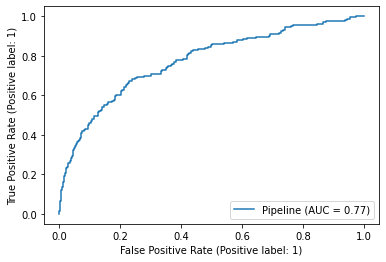

In [0]:
RocCurveDisplay.from_estimator(benchmark, X, y)

Oops! It appears that the AUC ROC curve reveals a different story compared to the initially high accuracy. The plot indicates that our model's performance is not as impressive as the accuracy metric initially suggested. In fact, the AUC ROC curve indicates that our model was able to correctly classify only 77% of the cases. Now let's use the confusion matrix to further investigate what is happening with our model's performance.

Out[187]: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fc35c8eaf10>

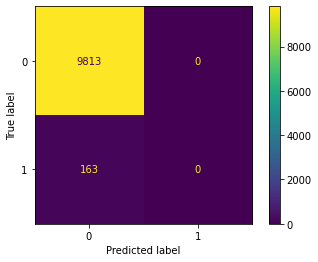

In [0]:
ConfusionMatrixDisplay.from_estimator(benchmark, X, y)

Finally, we have uncovered the truth about our model's performance. Upon closer examination, it becomes evident that our model excelled in classifying non-failure machines. However, when it comes to identifying failure cases, our model fared poorly, failing to correctly classify even a single instance of failure machines.

It is imperative to address the significant imbalance between failure and non-failure cases in our dataset, as any misclassification could have severe consequences. We must now focus on improving our model's ability to accurately identify and classify failure instances, as it is a critical aspect of our application.

Continues...